<a href="https://colab.research.google.com/github/ShubhamP1028/DeepLearningTute/blob/main/StockPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
df = pd.read_csv('stock_data.csv')
df.head()

,Unnamed: 0,Stock_1,Stock_2,Stock_3,Stock_4,Stock_5
0,2020-01-01,101.764052,100.160928,99.494642,99.909756,101.761266
1,2020-01-02,102.171269,99.969968,98.682973,100.640755,102.528643
2,2020-01-03,103.171258,99.575237,98.182139,100.574847,101.887811
3,2020-01-04,105.483215,99.308641,97.149381,100.925017,101.490049
4,2020-01-05,107.453175,98.188428,99.575396,101.594411,101.604283


*  Stock_1 >>
Columns representing the closing prices of N stocks. Each column contains the closing prices of a specific stock for each date in the dataset.


*  Stock_2 >>
Columns representing the closing prices of N stocks. Each column contains the closing prices of a specific stock for each date in the dataset.


*  Stock_3 >>
Columns representing the closing prices of N stocks. Each column contains the closing prices of a specific stock for each date in the dataset.


*  Stock_4 >>
Columns representing the closing prices of N stocks. Each column contains the closing prices of a specific stock for each date in the dataset.


*  Stock_5 >>
Columns representing the closing prices of N stocks. Each column contains the closing prices of a specific stock for each date in the

In [2]:
df = df.rename(columns={'Unnamed: 0': 'Date'})

In [39]:
df.shape

(361, 36)

In [3]:
print(df.isnull().sum(),'\n')
print(df.info(),'\n')
print(df.describe())

Date       0
Stock_1    0
Stock_2    0
Stock_3    0
Stock_4    0
Stock_5    0
dtype: int64 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     365 non-null    object 
 1   Stock_1  365 non-null    float64
 2   Stock_2  365 non-null    float64
 3   Stock_3  365 non-null    float64
 4   Stock_4  365 non-null    float64
 5   Stock_5  365 non-null    float64
dtypes: float64(5), object(1)
memory usage: 17.2+ KB
None 

          Stock_1     Stock_2     Stock_3     Stock_4     Stock_5
count  365.000000  365.000000  365.000000  365.000000  365.000000
mean   107.772577   81.105216   94.519502  117.407560  106.866865
std      7.398296   11.435212    6.519213    6.778527    3.760968
min     91.474442   62.414219   81.111434   99.909756   99.833309
25%    101.603117   69.328263   89.788068  112.209912  103.927072
50%    107.421299   84.283525   94.495546  

In [4]:
# Convert Date to datetime and sort
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date').reset_index(drop=True)

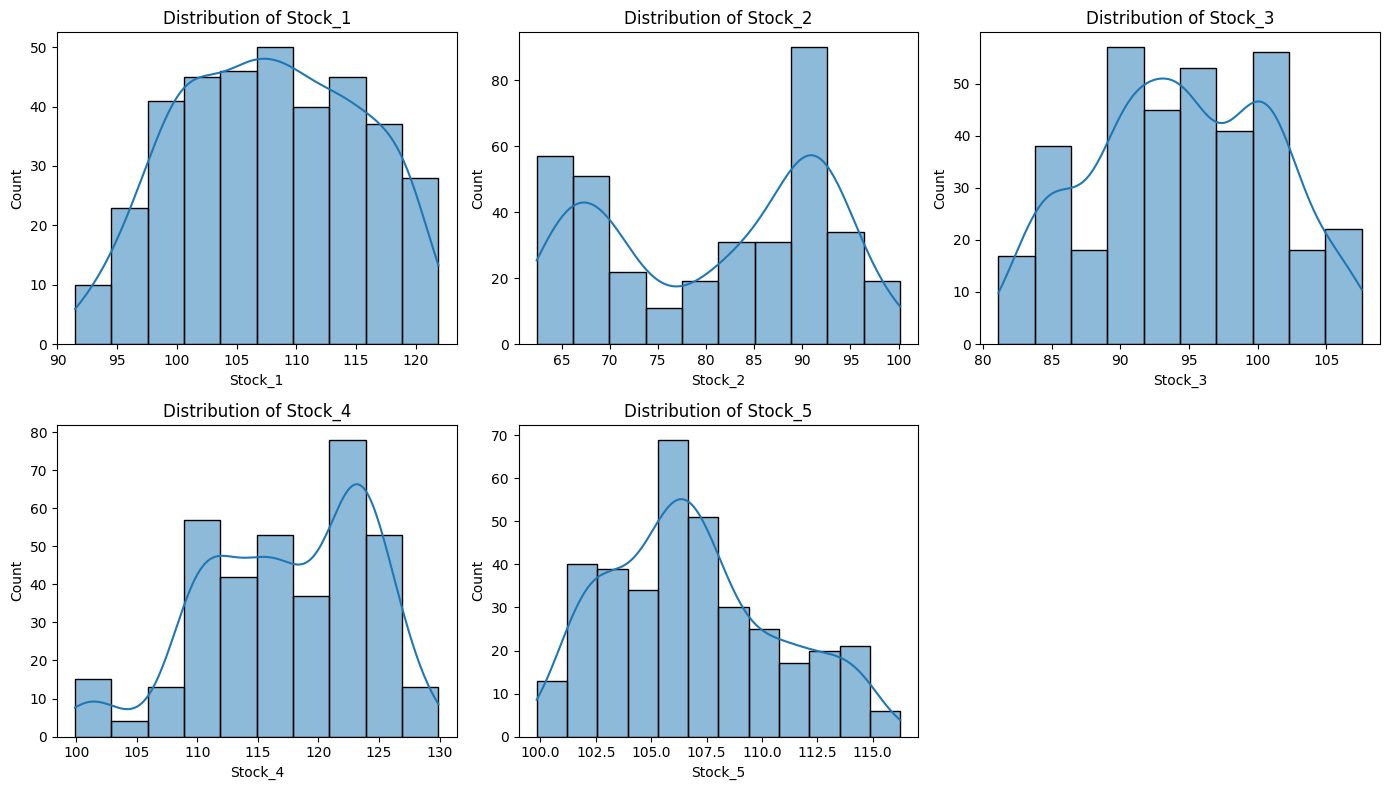

In [5]:
plt.figure(figsize=(14, 8))
columns = ['Stock_1', 'Stock_2', 'Stock_3', 'Stock_4', 'Stock_5']
for i, column in enumerate(columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

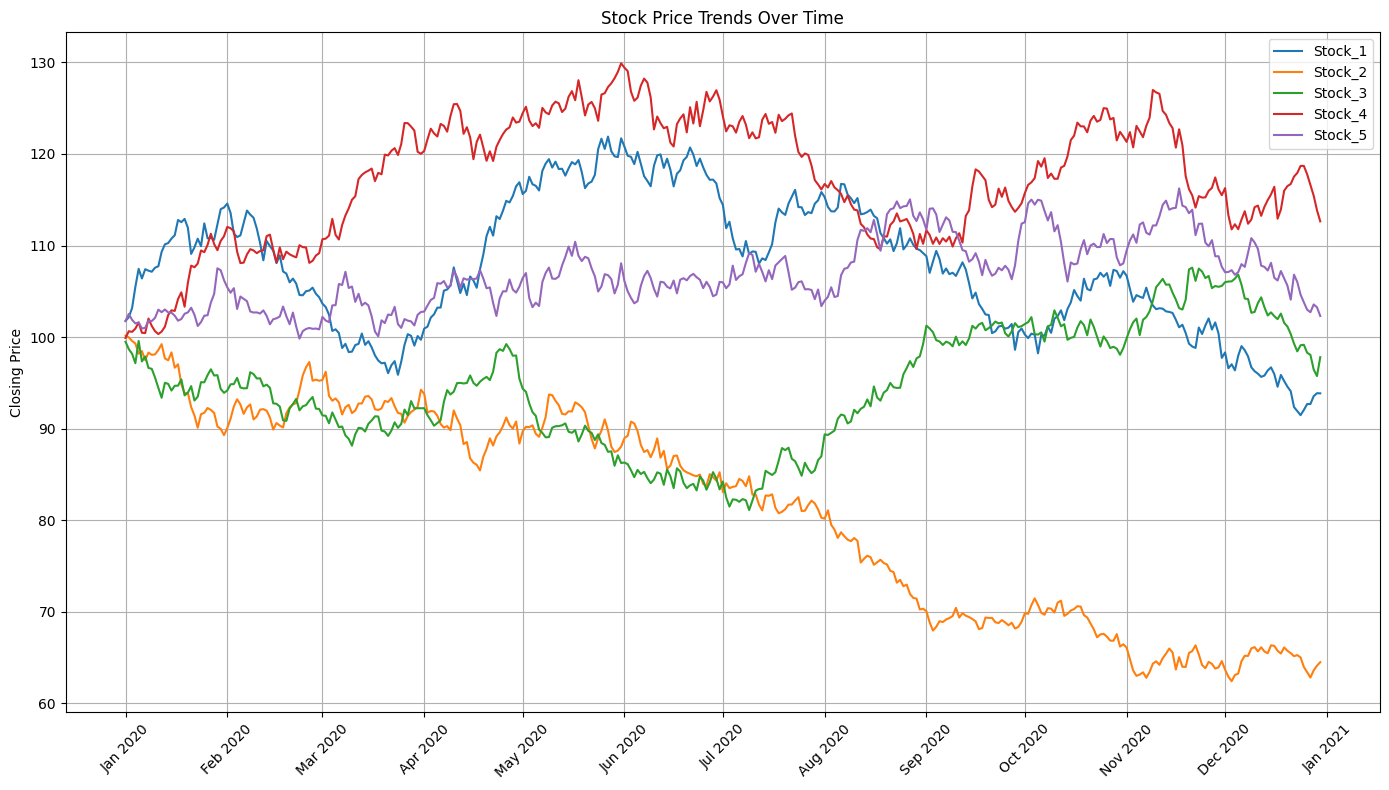

In [6]:
import matplotlib.dates as mdates

plt.figure(figsize=(14, 8))
for column in df.columns[1:]:  # Skip the 'Date' column
    plt.plot(df['Date'], df[column], label=column)  # Use the Date column directly

plt.title('Stock Price Trends Over Time')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)

# Format x-axis to show months
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator())  # Set major ticks at the beginning of each month
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Format as 'Jan 2023'

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

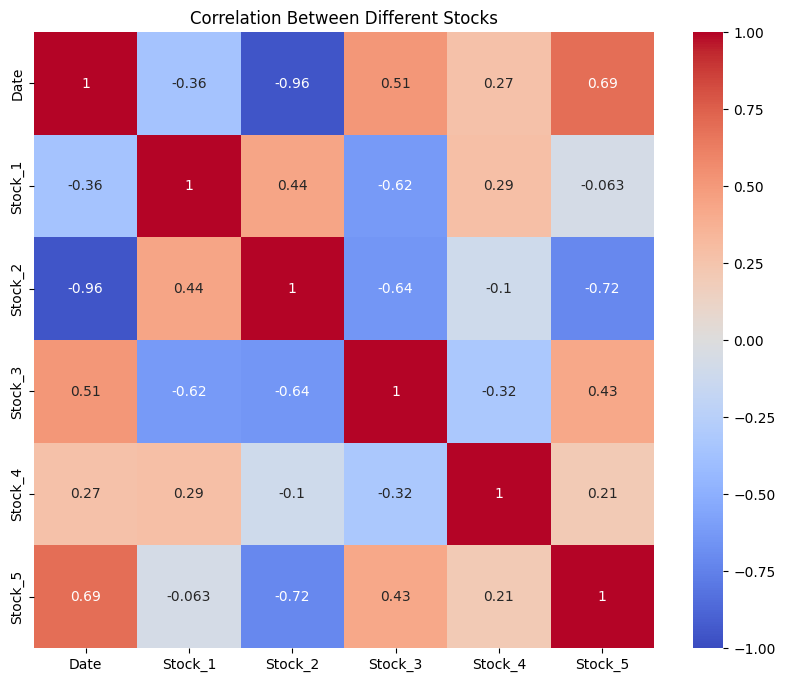

In [7]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Between Different Stocks')
plt.show()

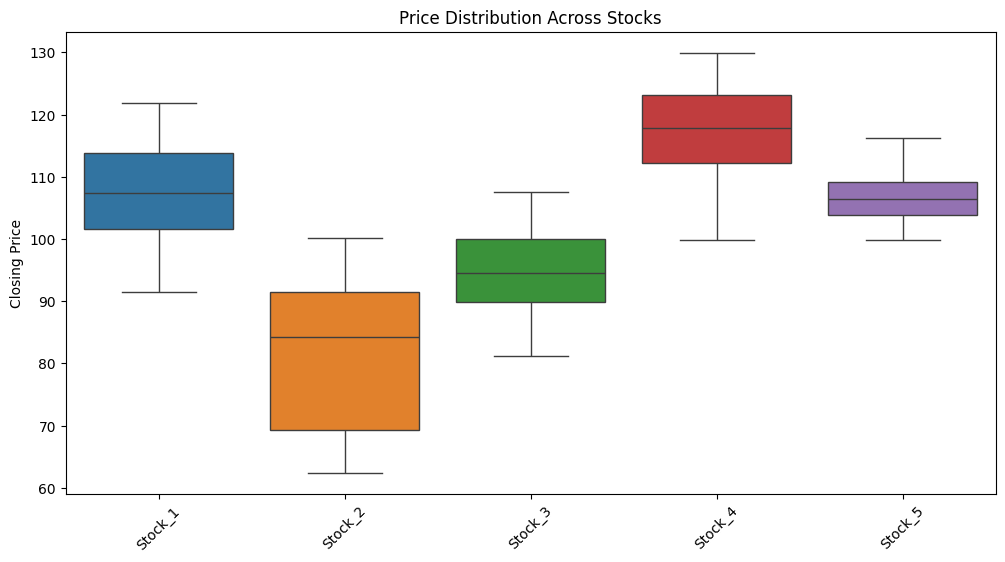

In [8]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.title('Price Distribution Across Stocks')
plt.ylabel('Closing Price')
plt.xticks(rotation=45)
plt.show()

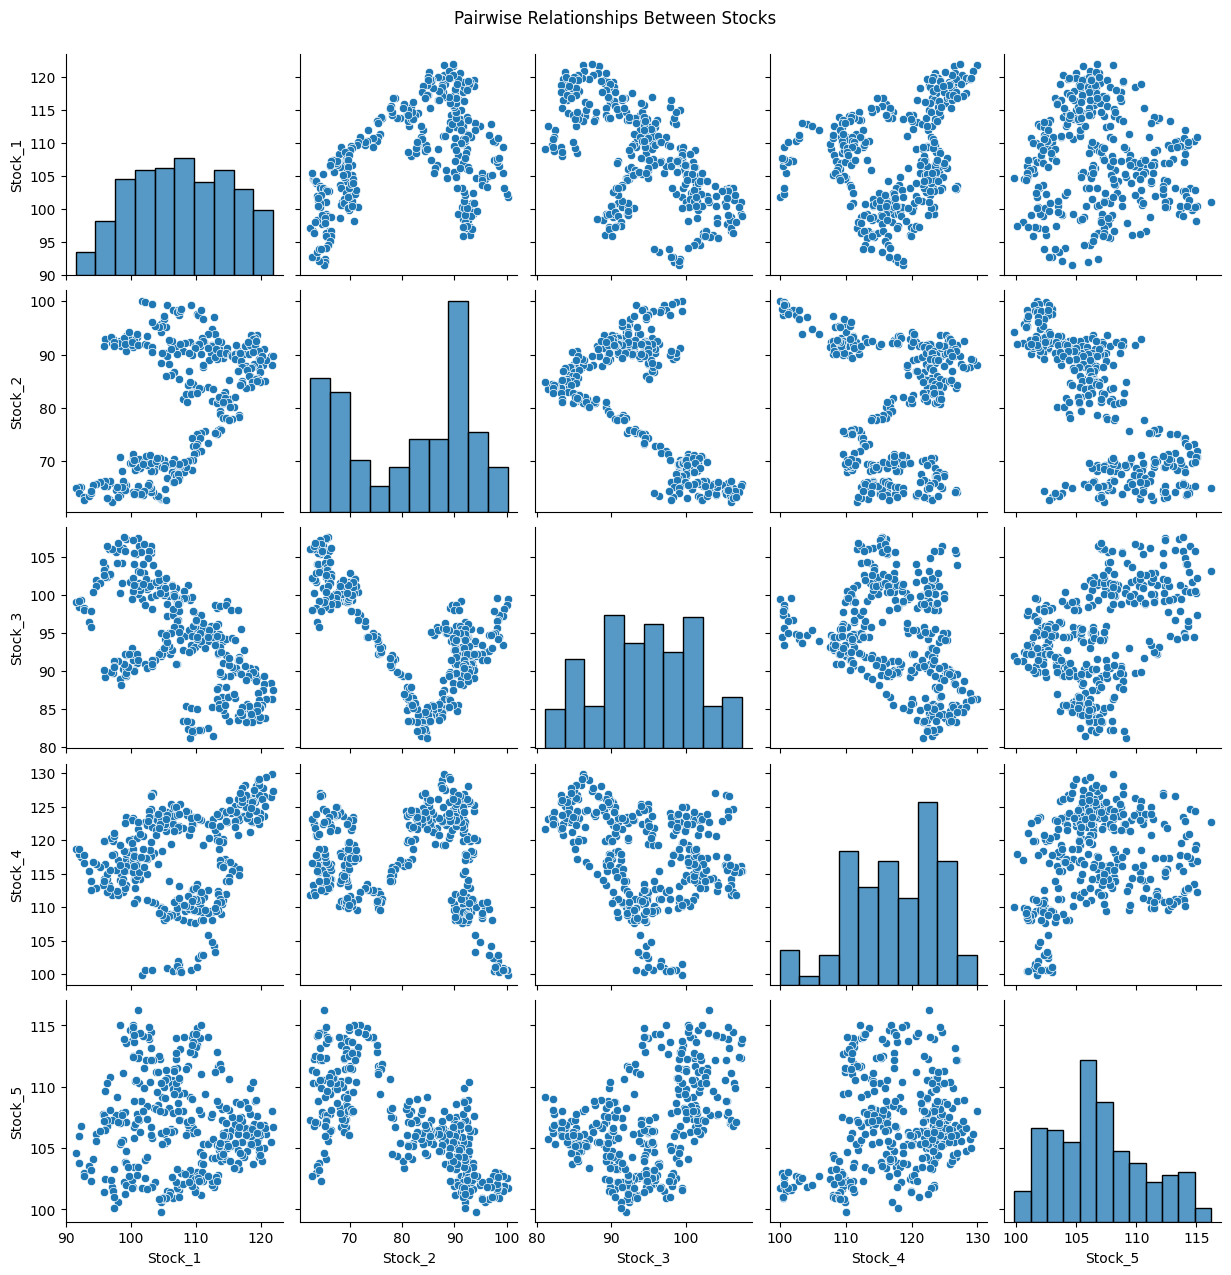

In [9]:
sns.pairplot(df)
plt.suptitle('Pairwise Relationships Between Stocks', y=1.02)
plt.show()

Making data more stationary

In [10]:
for col in ['Stock_1','Stock_2','Stock_3','Stock_4','Stock_5']:
    df[f'{col}_log_return'] = np.log(df[col] / df[col].shift(1))

rolling statistics

In [11]:
for col in ['Stock_1','Stock_2','Stock_3','Stock_4','Stock_5']:
    df[f'{col}_roll_mean_5'] = df[col].rolling(5).mean()
    df[f'{col}_roll_std_5'] = df[col].rolling(5).std()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 365 non-null    datetime64[ns]
 1   Stock_1              365 non-null    float64       
 2   Stock_2              365 non-null    float64       
 3   Stock_3              365 non-null    float64       
 4   Stock_4              365 non-null    float64       
 5   Stock_5              365 non-null    float64       
 6   Stock_1_log_return   364 non-null    float64       
 7   Stock_2_log_return   364 non-null    float64       
 8   Stock_3_log_return   364 non-null    float64       
 9   Stock_4_log_return   364 non-null    float64       
 10  Stock_5_log_return   364 non-null    float64       
 11  Stock_1_roll_mean_5  361 non-null    float64       
 12  Stock_1_roll_std_5   361 non-null    float64       
 13  Stock_2_roll_mean_5  361 non-null  

In [13]:
from sklearn.preprocessing import PowerTransformer
# Yeo-Johnson Transform for skewed columns (Stocks 2 & 4) ====
pt = PowerTransformer(method='yeo-johnson')
for col in ['Stock_2', 'Stock_4']:
    df[col] = pt.fit_transform(df[[col]])

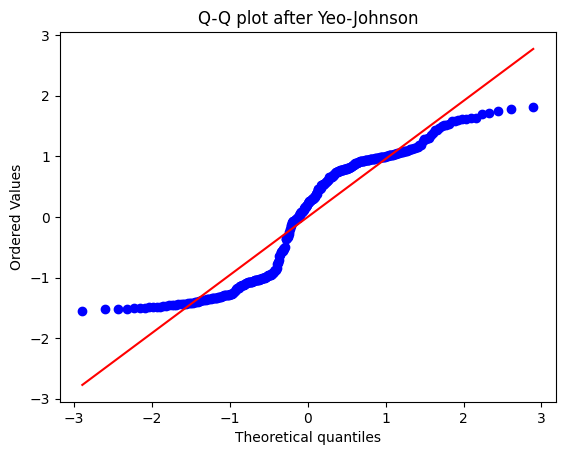

In [14]:
from scipy import stats
stats.probplot(df['Stock_2'], dist="norm", plot=plt)
plt.title("Q-Q plot after Yeo-Johnson")
plt.show()

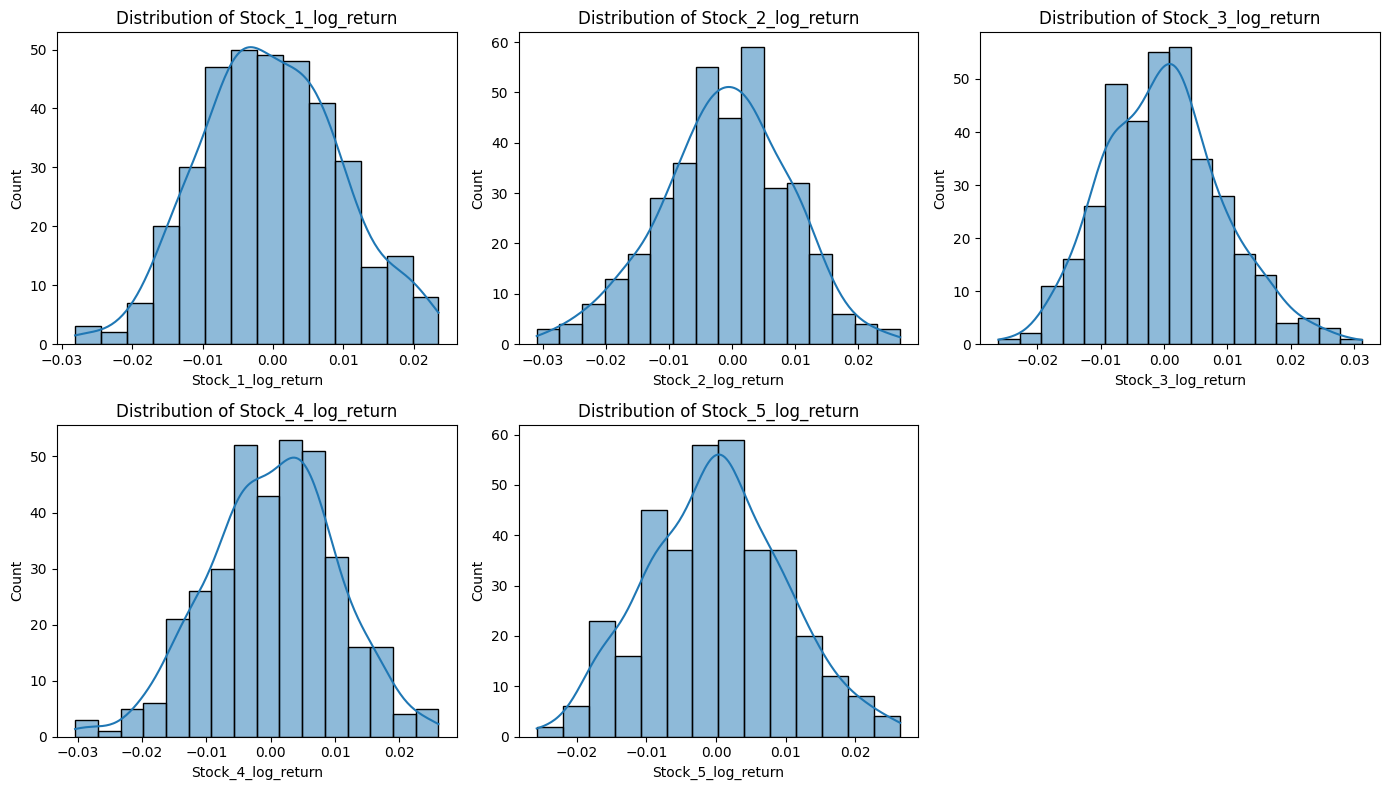

In [15]:
plt.figure(figsize=(14, 8))
columns = ['Stock_1_log_return', 'Stock_2_log_return', 'Stock_3_log_return', 'Stock_4_log_return', 'Stock_5_log_return']
for i, column in enumerate(columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
stock_cols =['Stock_1_log_return', 'Stock_2_log_return', 'Stock_3_log_return', 'Stock_4_log_return', 'Stock_5_log_return']
df[stock_cols] = scaler.fit_transform(df[stock_cols])


In [17]:
# Lag features (previous prices)
lags = [1, 2, 3]
for col in stock_cols:
    for lag in lags:
        df[f'{col}_lag_{lag}'] = df[col].shift(lag)

In [18]:
df = df.dropna().reset_index(drop=True)

preparing the data

In [24]:
print(df.columns.tolist())

['Date', 'Stock_1', 'Stock_2', 'Stock_3', 'Stock_4', 'Stock_5', 'Stock_1_log_return', 'Stock_2_log_return', 'Stock_3_log_return', 'Stock_4_log_return', 'Stock_5_log_return', 'Stock_1_roll_mean_5', 'Stock_1_roll_std_5', 'Stock_2_roll_mean_5', 'Stock_2_roll_std_5', 'Stock_3_roll_mean_5', 'Stock_3_roll_std_5', 'Stock_4_roll_mean_5', 'Stock_4_roll_std_5', 'Stock_5_roll_mean_5', 'Stock_5_roll_std_5', 'Stock_1_log_return_lag_1', 'Stock_1_log_return_lag_2', 'Stock_1_log_return_lag_3', 'Stock_2_log_return_lag_1', 'Stock_2_log_return_lag_2', 'Stock_2_log_return_lag_3', 'Stock_3_log_return_lag_1', 'Stock_3_log_return_lag_2', 'Stock_3_log_return_lag_3', 'Stock_4_log_return_lag_1', 'Stock_4_log_return_lag_2', 'Stock_4_log_return_lag_3', 'Stock_5_log_return_lag_1', 'Stock_5_log_return_lag_2', 'Stock_5_log_return_lag_3']


In [27]:
feature_cols = ['Stock_1_log_return', 'Stock_2_log_return', 'Stock_3_log_return', 'Stock_4_log_return', 'Stock_5_log_return',
    # rolling means & std (5-day)
    'Stock_1_roll_mean_5', 'Stock_1_roll_std_5', 'Stock_2_roll_mean_5', 'Stock_2_roll_std_5',
    'Stock_3_roll_mean_5', 'Stock_3_roll_std_5', 'Stock_4_roll_mean_5', 'Stock_4_roll_std_5',
    'Stock_5_roll_mean_5', 'Stock_5_roll_std_5',
    # lagged features (lags 1,2,3)
    'Stock_1_log_return_lag_1', 'Stock_1_log_return_lag_2', 'Stock_1_log_return_lag_3',
    'Stock_2_log_return_lag_1', 'Stock_2_log_return_lag_2', 'Stock_2_log_return_lag_3',
    'Stock_3_log_return_lag_1', 'Stock_3_log_return_lag_2', 'Stock_3_log_return_lag_3',
    'Stock_4_log_return_lag_1', 'Stock_4_log_return_lag_2', 'Stock_4_log_return_lag_3',
    'Stock_5_log_return_lag_1', 'Stock_5_log_return_lag_2', 'Stock_5_log_return_lag_3'
]

In [28]:
feature_cols = [col for col in feature_cols if col in df.columns]


In [29]:
print(feature_cols)

['Stock_1_log_return', 'Stock_2_log_return', 'Stock_3_log_return', 'Stock_4_log_return', 'Stock_5_log_return', 'Stock_1_roll_mean_5', 'Stock_1_roll_std_5', 'Stock_2_roll_mean_5', 'Stock_2_roll_std_5', 'Stock_3_roll_mean_5', 'Stock_3_roll_std_5', 'Stock_4_roll_mean_5', 'Stock_4_roll_std_5', 'Stock_5_roll_mean_5', 'Stock_5_roll_std_5', 'Stock_1_log_return_lag_1', 'Stock_1_log_return_lag_2', 'Stock_1_log_return_lag_3', 'Stock_2_log_return_lag_1', 'Stock_2_log_return_lag_2', 'Stock_2_log_return_lag_3', 'Stock_3_log_return_lag_1', 'Stock_3_log_return_lag_2', 'Stock_3_log_return_lag_3', 'Stock_4_log_return_lag_1', 'Stock_4_log_return_lag_2', 'Stock_4_log_return_lag_3', 'Stock_5_log_return_lag_1', 'Stock_5_log_return_lag_2', 'Stock_5_log_return_lag_3']


In [30]:
df = df.dropna(subset=feature_cols).reset_index(drop=True)

In [31]:
import numpy as np
# Number of time steps for the LSTM input
seq_len = 10

def create_lstm_sequences(data, features, target_col, seq_len):
    X, y = [], []
    feature_data = data[features].values
    target_data = data[target_col].values
    for i in range(len(data) - seq_len):
        X.append(feature_data[i:i+seq_len])
        y.append(target_data[i+seq_len])
    return np.array(X), np.array(y)

X, y = create_lstm_sequences(df, feature_cols, 'Stock_1_log_return', seq_len)


In [32]:
train_size = int(len(X) * 0.8)
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

In [38]:
X_test.shape , y_test.shape , X_train.shape , y_train.shape


((71, 10, 30), (71,), (280, 10, 30), (280,))

model building

In [40]:
# !pip install tensorflow

In [47]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [48]:
def build_lstm_model(input_shape):
    model = Sequential()
# First LSTM layer with L2 regularization
    model.add(LSTM(
        units=64,
        return_sequences=True,
        input_shape=input_shape,
        kernel_regularizer=regularizers.l2(0.001)
    ))
    model.add(Dropout(0.3))  # increased dropout to 30% for stronger regularization
# Second LSTM layer
    model.add(LSTM(
        units=32,
        kernel_regularizer=regularizers.l2(0.001)
    ))
    model.add(Dropout(0.3))
# Output layer
    model.add(Dense(units=1))
# Lower learning rate for more stable convergence
    optimizer = Adam(learning_rate=0.0005)
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])
    return model
# Build model
model = build_lstm_model(input_shape=(X_train.shape[1], X_train.shape[2]))
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 10, 64)         │        24,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 10, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 36,769 (143.63 KB)

 Trainable params: 36,769 (143.63 KB)

 Non-trainable params: 0 (0.00 B)

In [50]:
# Setup Callbacks
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=7,                # shorter patience so we don't waste epochs
    restore_best_weights=True
)

checkpoint = ModelCheckpoint(
    'best_model.h5',
    monitor='val_loss',
    save_best_only=True
)

In [51]:
# Train model
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop, checkpoint],
    verbose=1
)

Epoch 1/100
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.1489 - mae: 0.7878

7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 104ms/step - loss: 1.1684 - mae: 0.7997 - val_loss: 1.2288 - val_mae: 0.8287
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.1941 - mae: 0.8415 

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 1.1947 - mae: 0.8424 - val_loss: 1.2251 - val_mae: 0.8321
Epoch 3/100
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.2868 - mae: 0.8751

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 1.2585 - mae: 0.8643 - val_loss: 1.2169 - val_mae: 0.8311
Epoch 4/100
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.2265 - mae: 0.8568

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 1.2007 - mae: 0.8471 - val_loss: 1.2117 - val_mae: 0.8263
Epoch 5/100
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.1917 - mae: 0.8630

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 1.1824 - mae: 0.8568 - val_loss: 1.2061 - val_mae: 0.8262
Epoch 6/100
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.1704 - mae: 0.8412

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 1.1571 - mae: 0.8353 - val_loss: 1.1970 - val_mae: 0.8290
Epoch 7/100
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.1123 - mae: 0.8561 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 1.1113 - mae: 0.8482 - val_loss: 1.1812 - val_mae: 0.8225
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 1.1972 - mae: 0.8650 - val_loss: 1.1918 - val_mae: 0.8264
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 1.1221 - mae: 0.8316 - val_loss: 1.1930 - val_mae: 0.8282
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 1.0720 - mae: 0.8047 - val_loss: 1.1879 - val_mae: 0.8278
Epoch 11/100
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.0868 - mae: 0.8352 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 1.0916 - mae: 0.8337 - val_loss: 1.1696 - val_mae: 0.8245
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 1.1271 - mae: 0.8432 - val_loss: 1.1736 - val_mae: 0.8248
Epoch 13/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 1.1773 - mae: 0.8465 - val_loss: 1.1751 - val_mae: 0.8269
Epoch 14/100
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.1130 - mae: 0.8219 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 1.1141 - mae: 0.8259 - val_loss: 1.1675 - val_mae: 0.8251
Epoch 15/100
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.1978 - mae: 0.8789

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 1.1725 - mae: 0.8665 - val_loss: 1.1368 - val_mae: 0.8153
Epoch 16/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 1.0611 - mae: 0.8239 - val_loss: 1.1475 - val_mae: 0.8145
Epoch 17/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 1.1651 - mae: 0.8555 - val_loss: 1.1478 - val_mae: 0.8142
Epoch 18/100
5/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.0883 - mae: 0.8502

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 1.0848 - mae: 0.8427 - val_loss: 1.1323 - val_mae: 0.8125
Epoch 19/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 1.0904 - mae: 0.8158 - val_loss: 1.1506 - val_mae: 0.8250
Epoch 20/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 1.1378 - mae: 0.8504 - val_loss: 1.1559 - val_mae: 0.8237
Epoch 21/100
5/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1.0975 - mae: 0.8199

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 1.0787 - mae: 0.8159 - val_loss: 1.1300 - val_mae: 0.8195
Epoch 22/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 1.1634 - mae: 0.8664 - val_loss: 1.1578 - val_mae: 0.8310
Epoch 23/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 1.0658 - mae: 0.8222 - val_loss: 1.1416 - val_mae: 0.8253
Epoch 24/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 1.1015 - mae: 0.8312 - val_loss: 1.1392 - val_mae: 0.8222
Epoch 25/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 1.1003 - mae: 0.8577 - val_loss: 1.1369 - val_mae: 0.8223
Epoch 26/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 1.0047 - mae: 0.8046 - val_loss: 1.1325 - val_mae: 0.8211
Epoch 27/100
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.0991 - mae: 0.8335 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 1.0868 - mae: 0.8293 - val_loss: 1.1243 - val_mae: 0.8170
Epoch 28/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 1.0709 - mae: 0.8471 - val_loss: 1.1262 - val_mae: 0.8224
Epoch 29/100
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.0141 - mae: 0.7891

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 1.0228 - mae: 0.7968 - val_loss: 1.1226 - val_mae: 0.8217
Epoch 30/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 1.0130 - mae: 0.7878 - val_loss: 1.1282 - val_mae: 0.8202
Epoch 31/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 1.0377 - mae: 0.8105 - val_loss: 1.1349 - val_mae: 0.8257
Epoch 32/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 1.0848 - mae: 0.8392 - val_loss: 1.1362 - val_mae: 0.8283
Epoch 33/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.9943 - mae: 0.8028 - val_loss: 1.1325 - val_mae: 0.8253
Epoch 34/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 1.0832 - mae: 0.8402 - val_loss: 1.1314 - val_mae: 0.8285
Epoch 35/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 1.0871 - mae: 0.8365 - val_loss: 1.1290 - val_mae: 0.8283
Epoch 36/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 1.0259 - mae: 0.8036 - val_loss: 1.1311 - val_mae: 0.8265


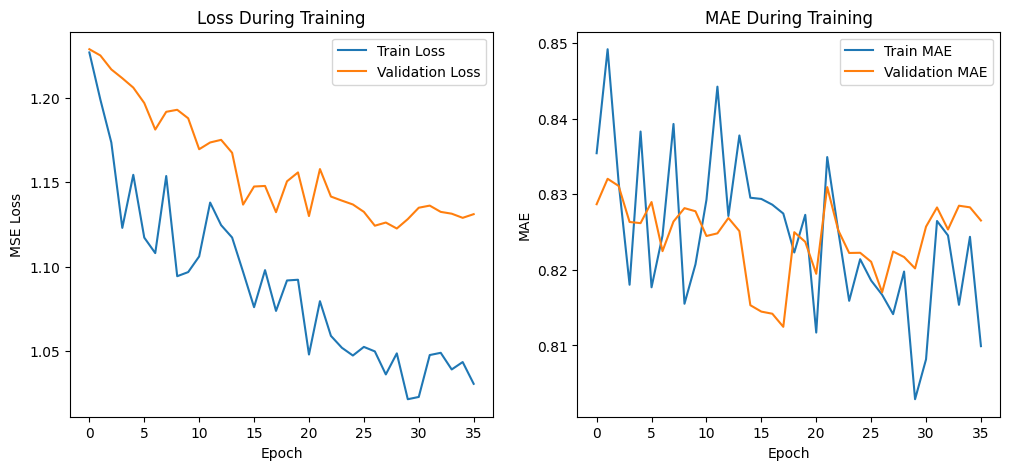

In [52]:
# Plot Training History ---
def plot_training_history(history):
    plt.figure(figsize=(12, 5))

    # Loss plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss During Training')
    plt.xlabel('Epoch')
    plt.ylabel('MSE Loss')
    plt.legend()

    # MAE plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['mae'], label='Train MAE')
    plt.plot(history.history['val_mae'], label='Validation MAE')
    plt.title('MAE During Training')
    plt.xlabel('Epoch')
    plt.ylabel('MAE')
    plt.legend()

    plt.show()

plot_training_history(history)


In [53]:
# --- 5. Evaluate on Test Set ---
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test MSE Loss: {test_loss:.5f}, Test MAE: {test_mae:.5f}")


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.8488 - mae: 0.7212
Test MSE Loss: 0.89774, Test MAE: 0.74426


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 341ms/step


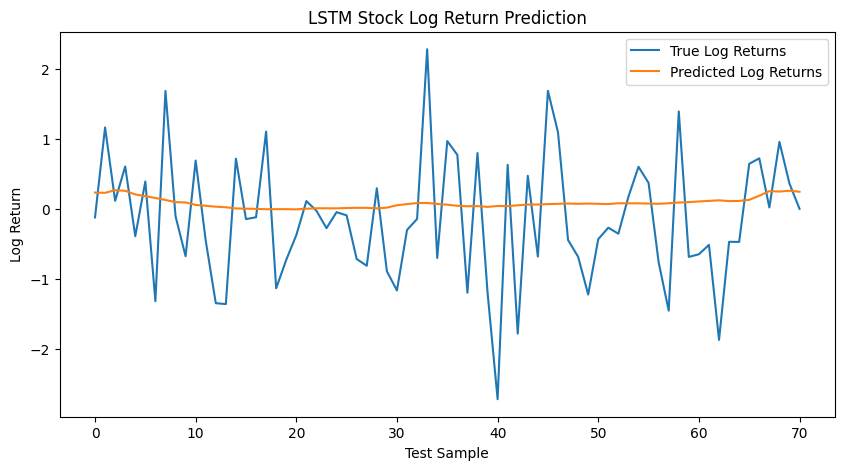

In [54]:
# --- 6. Make Predictions and Visualize ---
y_pred = model.predict(X_test).flatten()

plt.figure(figsize=(10,5))
plt.plot(y_test, label='True Log Returns')
plt.plot(y_pred, label='Predicted Log Returns')
plt.title('LSTM Stock Log Return Prediction')
plt.xlabel('Test Sample')
plt.ylabel('Log Return')
plt.legend()
plt.show()